In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read jsonl with pd
LOCATION_PROCESSED = 'data_processed'
LOCATION = 'data'
FILENAME = 'r_frugal_posts.jsonl'

df = pd.read_json(f"{LOCATION}/{FILENAME}", lines=True)

In [3]:
for col in df.columns:
    print(col)

archived
author
author_flair_background_color
author_flair_css_class
author_flair_richtext
author_flair_text
author_flair_text_color
author_flair_type
brand_safe
can_gild
contest_mode
created_utc
distinguished
domain
edited
gilded
hidden
hide_score
id
is_crosspostable
is_reddit_media_domain
is_self
is_video
link_flair_css_class
link_flair_richtext
link_flair_text
link_flair_text_color
link_flair_type
locked
media
media_embed
no_follow
num_comments
num_crossposts
over_18
parent_whitelist_status
permalink
retrieved_on
rte_mode
score
secure_media
secure_media_embed
selftext
send_replies
spoiler
stickied
subreddit
subreddit_id
subreddit_name_prefixed
subreddit_type
suggested_sort
thumbnail
thumbnail_height
thumbnail_width
title
url
whitelist_status
name
ups
upvote_ratio
post_hint
preview
author_cakeday
is_original_content
approved_by
banned_by
clicked
created
downs
likes
num_reports
saved
selftext_html
mod_reports
report_reasons
user_reports
from
from_id
from_kind
quarantine
view_count
app

In [4]:
# show selftext
print(df['title'])
print(df['link_flair_text'].value_counts())
print(df['selftext'].value_counts())

0         Be green, save green (wipe the green from your...
1         Even thrifty folks need a massage! Why you sho...
2          ItsTheRecessionStupid: Tip 31 - Air Your Laundry
3         Just swipe and sign... swipe and sign... Why y...
4         ItsTheRecessionStupid Tip 32 - Drink Coffee at...
                                ...                        
202003    For an app that is free on mobile but you need...
202004                      I need customers or 100 dollars
202005                                Geek Squad is no Help
202006    Frugal car buyers what’s your best strategy fo...
202007    Has anyone used Ibotta for cashback on merchan...
Name: title, Length: 202008, dtype: object
link_flair_text
Advice Needed ✋         10743
Tip/advice 💁‍♀️          5301
Discussion 💬             5237
Frugal Win 🎉             3924
Advice Needed            2522
                        ...  
Removed: Rule 2 & 6         1
Question in comments        1
Ground turkey               1
US Stimulus

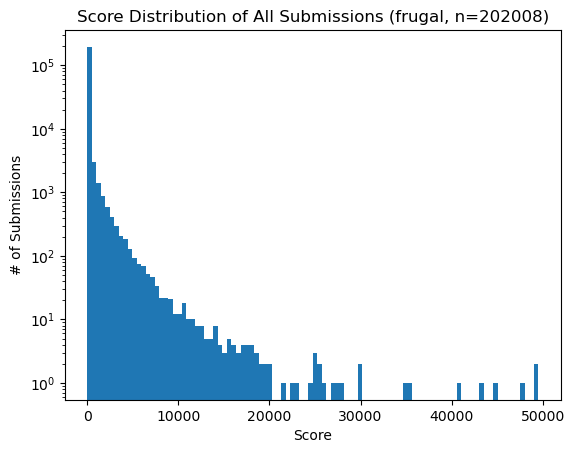

In [5]:
# plot scores

# set log scale on y axis

df['score'].plot.hist(bins=100)
plt.yscale('log')

plt.title(f'Score Distribution of All Submissions (frugal, n={len(df)})')
plt.xlabel('Score')
plt.ylabel('# of Submissions')

plt.savefig(f"{LOCATION_PROCESSED}/score_distribution_all.png")
plt.show()

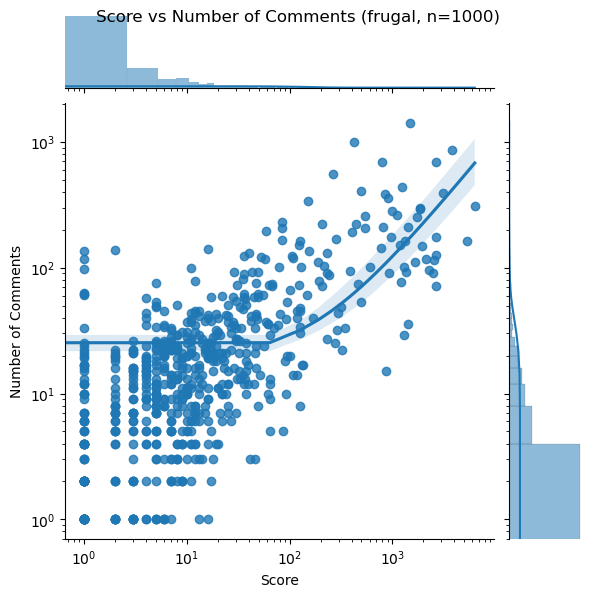

In [13]:
# plot score vs num_comments as seaborn jointplot
import seaborn as sns
n = 1000
g = sns.jointplot(x='score', y='num_comments', data=df.sample(n), kind='reg')
# set log scale on both axes
# g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')
# title
g.fig.suptitle(f'Score vs Number of Comments (frugal, n={n})')
plt.xlabel('Score')
plt.ylabel('Number of Comments')
plt.savefig(f"{LOCATION_PROCESSED}/score_vs_num_comments.png")

# g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)


/var/folders/wq/k5hy5l4j6pbd_js2dbk6vhfc0000gn/T/ipykernel_8913/250998208.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby('score_bins')['num_comments'].sum()


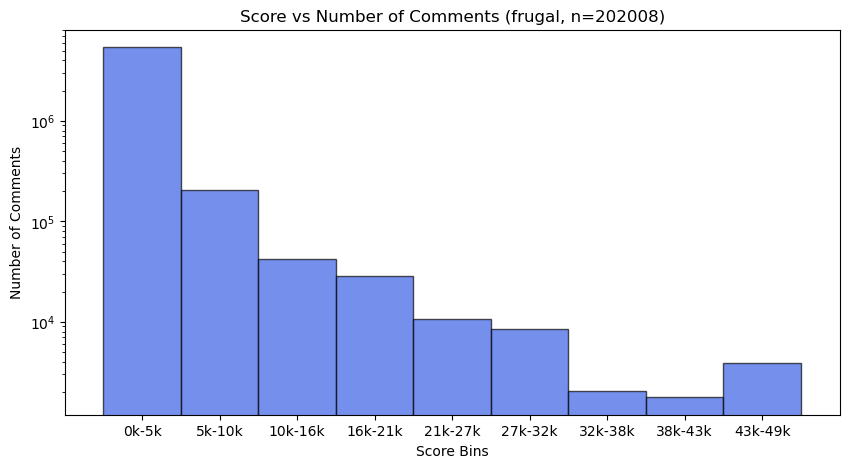

In [91]:
# make a histogram of the score vs number of comments in the same plot
# put all the number of comments into the score bins
# score on the x axis, number of comments on the y axis

# create bins for the score based on the df len 
score_bins = np.linspace(df['score'].min(), df['score'].max(), 10, dtype=int)

# for all the submissions, put the num_comments into the corresponding bin
df['score_bins'] = pd.cut(df['score'], bins=score_bins, labels=score_bins[:-1])

# group by the score bins and sum the num_comments
df_grouped = df.groupby('score_bins')['num_comments'].sum()

# plot the histogram

# set bins to be adjacent to each other
# make sure that the ticks are to the left of the bars
df_grouped.plot(kind='bar', width=1, edgecolor='#080708', alpha=0.7, color='#3B60E4', figsize=(10, 5), rot=0)

# set tick to say from x to y
plt.xticks(range(len(df_grouped)), [f'{score_bins[i]//1000}k-{score_bins[i+1]//1000}k' for i in range(len(df_grouped))])

# set flow width to max
plt.xlim(-1, len(df_grouped))

plt.yscale('log')
plt.title(f'Score vs Number of Comments (frugal, n={len(df)})')
plt.xlabel('Score Bins')
plt.ylabel('Number of Comments')
plt.savefig(f"{LOCATION_PROCESSED}/score_vs_num_comments_histogram.png")
plt.show()


In [89]:
print("Total number of submissions: ", len(df))
print("Total number of comments: ", df['num_comments'].sum())
lim = 2000
print(f"Number of submissions in score range 0 to {lim}: {len(df[df['score'] < lim])}")

print(f"Number of comments in score range 0 to {lim}: {df[df['score'] < lim]['num_comments'].sum()}")

Total number of submissions:  202008
Total number of comments:  5926082
Number of submissions in score range 0 to 2000: 199639
Number of comments in score range 0 to 2000: 5034955
